In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as pca 

In [2]:
dataset=pd.read_csv('dataset.csv').astype(float)

In [4]:
dataset.head(11) 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,27.422157,-29.662712,-23.297163,-15.161935,0.345581,3.706750,-5.507209,-46.992476,5.175469,-47.768145,...,7.815960,24.320965,-33.987522,22.306088,31.173511,31.264830,8.380699,-25.843189,36.706408,-43.480792
1,3.489482,-19.153551,-14.636424,14.688258,20.114204,13.532852,34.298084,22.982509,37.938670,-35.648144,...,11.145527,-38.886603,44.579337,37.308519,29.560535,-10.643331,-6.499263,19.921666,-3.528982,31.068739
2,4.293509,22.691579,-1.045155,-8.740350,12.401082,31.362987,-18.831206,-35.384557,8.161430,-16.421762,...,48.190331,-0.503157,-21.740678,15.972237,1.122335,-45.473538,10.518065,-5.818320,-29.466301,-13.676685
3,-2.139348,23.158754,-26.241206,19.426465,9.472049,8.453948,0.637211,-26.675984,-43.823329,11.840874,...,-51.613076,13.278858,-44.179281,32.912282,4.805774,3.960836,-15.888356,61.384773,33.112334,5.088320
4,-35.251034,27.281816,-29.470282,-21.786865,11.806822,58.655133,5.375230,59.740676,-49.007717,-21.801155,...,0.010857,20.975655,-21.358371,18.709369,22.362477,41.214565,-7.217724,31.173870,37.097532,-27.509420
5,-4.861801,-15.402314,-25.407147,17.586691,-32.644892,21.618702,-21.930380,-22.535385,-38.062022,-40.452435,...,-12.925809,-12.944203,4.593979,25.485162,-43.454827,-4.340491,10.802404,-33.808225,32.424686,18.251746
6,12.500294,-11.058106,-14.981854,-37.312501,-50.270837,-49.608609,-16.433999,32.224370,-55.105066,-45.910357,...,-32.663519,4.037847,-11.697109,5.786205,26.292906,-35.180448,30.896279,-8.868283,-23.544762,-43.111346
7,-38.397803,14.674760,-15.857134,-54.019325,7.345386,57.159846,4.408340,15.767448,-29.855138,0.967791,...,-32.209752,28.897703,-43.929990,33.825543,21.258529,20.291376,33.746996,50.161550,6.663464,-31.155756
8,31.371219,-33.449440,12.384110,39.905620,-43.709165,37.700329,1.280144,0.127754,-20.254036,-21.134469,...,-35.510588,-10.547955,-14.640658,22.208461,-39.256577,-25.072115,7.581198,1.279801,16.455480,43.035440
9,-16.845038,7.178291,-6.343280,-14.041362,27.966542,47.516239,30.459772,27.497531,-7.457983,6.652452,...,-32.721923,25.944564,-44.033581,35.043957,45.089304,13.078436,-11.089949,28.576030,4.206713,13.985129


In [154]:
num_data, num_features = dataset.shape

In [5]:
corr=dataset.corr() #finding correlation amongst all the features

1092


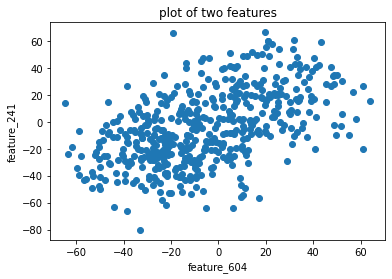

In [6]:
# showing the plot of two features versus each other- by random selection or by giving the features' numbers
randomselection=True
featurenumber1=10;featurenumber2=20;
if randomselection:
    corr_array=np.array(corr) #change data frame to array
    arg_corr=np.argwhere((abs(corr_array)>0.5)&(abs(corr_array)!=1)) #find arguments of elements
                                                       # having a correlation higher than 0.5
    np.random.seed(seed=13468)
    rand=np.random.randint(1,arg_corr.shape[0])
    print(rand)
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.scatter(dataset[f"feature_{arg_corr[rand,0]}"],dataset[f"feature_{arg_corr[rand,1]}"])
    ax.set_xlabel(f"feature_{arg_corr[rand,0]}")
    ax.set_ylabel(f"feature_{arg_corr[rand,1]}")
    ax.set_title('plot of two features')
else:
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.scatter(dataset[f"feature_{featurenumber1}"],dataset[f"feature_{featurenumber2}"])
    ax.set_xlabel(f"feature_{featurenumber1}")
    ax.set_ylabel(f"feature_{featurenumber2}")
    ax.set_title('plot of two features')   
    


In [8]:
ncomponent=3 #number of components to reduce the size of data features
pca_=pca(n_components=ncomponent).fit(dataset)
x_pca=pca_.transform(dataset)
pca_.explained_variance_ratio_
np.sum(pca_.explained_variance_ratio_)

0.20806257816093243

   principal_component_1  principal_component_2  principal_component_3
0             -46.235641              -1.672797              38.410180
1            -210.208758             -84.068249            -275.195623
2             -26.352795            -127.895751             166.058699
3            -116.106804            -269.368256            -286.123911
4            -110.183605            -279.657306            -308.823198


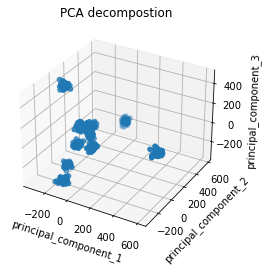

In [9]:
#Visulization for ncomponent=2 or 3
if ncomponent==2:
    data_pca=pd.DataFrame(x_pca,columns=['principal_component_1','principal_component_2'])
    print(data_pca.head())
    fig=plt.figure()
    ax=fig.add_subplot()
    ax.scatter(data_pca['principal_component_1'],data_pca['principal_component_2'])
    ax.set_xlabel('principal_component_1')
    ax.set_ylabel('principal_component_2')
    ax.set_title('PCA decompostion')
elif ncomponent==3:
    data_pca=pd.DataFrame(x_pca,columns=['principal_component_1','principal_component_2','principal_component_3'])
    print(data_pca.head())
    fig=plt.figure()
    ax=fig.add_subplot(projection='3d')
    ax.scatter(data_pca['principal_component_1'],data_pca['principal_component_2'],data_pca['principal_component_3'])
    ax.set_xlabel('principal_component_1')
    ax.set_ylabel('principal_component_2')
    ax.set_zlabel('principal_component_3')
    ax.set_title('PCA decompostion')    
    

In [186]:
#finding the minimum number of principal componenets to achieve a desire value for the variance
desire_variacne=0.7
sum_variance=0.0
ncomponent=1
while sum_variance<desire_variacne:
    pca_=pca(n_components=ncomponent).fit(dataset)
    sum_variance=np.sum(pca_.explained_variance_ratio_)
    ncomponent+=1
print(ncomponent) 
print(sum_variance)


88
0.7005035329039326
